<a href="https://colab.research.google.com/github/Kzamudioq/IA/blob/main/Analisis_datos_cancer_cevical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Reemplaza 'path_to_your_folder' con la ruta al directorio que contiene los archivos en Google Drive
drive_folder_path = '/content/drive/MyDrive/Analisis de datos'

# Cambia al directorio en Google Drive
os.chdir(drive_folder_path)

# Lista los archivos en el directorio actual
files = os.listdir()
print(files)

['kag_risk_factors_cervical_cancer.csv']


In [5]:
# Reemplaza '.csv' con el nombre de tu archivo CSV
file_name = '/content/drive/MyDrive/Analisis de datos/kag_risk_factors_cervical_cancer.csv'
data_path = os.path.join(drive_folder_path, file_name)

In [6]:
# Carga el conjunto de datos
try:
    cervical_data = pd.read_csv(data_path)
except Exception as e:
    print(f"Error al cargar el conjunto de datos: {e}")

In [7]:
cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [8]:
# Muestra información general del conjunto de datos
cervical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [9]:
# Muestra estadísticas descriptivas del conjunto de datos
cervical_data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


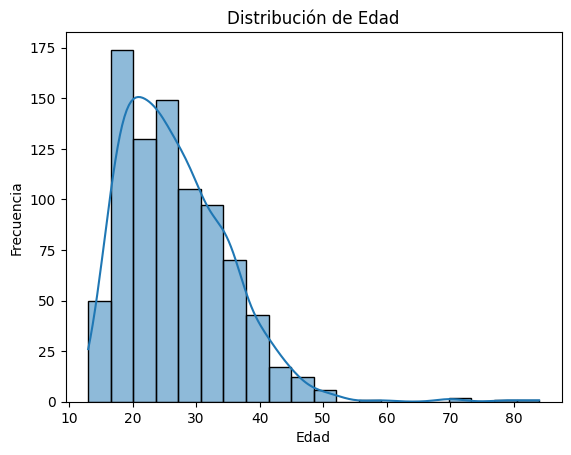

In [10]:
#Distribución de Edad
sns.histplot(cervical_data['Age'], bins=20, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')
plt.show()

# Preprocesamiento de la data

In [11]:
# Verificar la presencia de valores nulos en el conjunto de datos
missing_values = cervical_data.isnull().sum()

# Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(missing_values[missing_values > 0])

Valores nulos por columna:
Series([], dtype: int64)


In [12]:
# Mostrar los valores únicos de cada columna en el conjunto de datos
unique_values = cervical_data.apply(lambda col: col.unique())
print("Valores únicos de cada columna:")
print(unique_values)

Valores únicos de cada columna:
Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, ?, 7.0, 15.0, 8...
First sexual intercourse              [15.0, 14.0, ?, 16.0, 21.0, 23.0, 17.0, 26.0, ...
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, ?, 8.0, 7.0, 0....
Smokes                                                                    [0.0, 1.0, ?]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, ?, 1...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                   [0.0, 1.0, ?]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                       [0.0, 1.0, ?]
IUD (years)                           [0.0, 7.0, ?, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0, 1...


In [13]:
# Reemplazar '?' con NaN y convertir columnas numéricas a tipo float
cervical_data.replace('?', pd.np.nan, inplace=True)
cervical_data = cervical_data.astype({'Num of pregnancies': float, 'Smokes (years)': float,
                                      'Smokes (packs/year)': float, 'Hormonal Contraceptives (years)': float,
                                      'IUD (years)': float, 'STDs: Time since first diagnosis': float,
                                      'STDs: Time since last diagnosis': float})

<ipython-input-13-b0d5d2c23009>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  cervical_data.replace('?', pd.np.nan, inplace=True)


In [14]:
# Mostrar los valores únicos de cada columna en el conjunto de datos
unique_values = cervical_data.apply(lambda col: col.unique())
print("Valores únicos de cada columna:")
print(unique_values)

Valores únicos de cada columna:
Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, nan, 7.0, 15.0,...
First sexual intercourse              [15.0, 14.0, nan, 16.0, 21.0, 23.0, 17.0, 26.0...
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, nan, 8.0, 7.0, ...
Smokes                                                                  [0.0, 1.0, nan]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, nan,...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                 [0.0, 1.0, nan]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                     [0.0, 1.0, nan]
IUD (years)                           [0.0, 7.0, nan, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0,...


In [15]:
# Verificar la presencia de valores nulos en el conjunto de datos
missing_values = cervical_data.isnull().sum()

# Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(missing_values[missing_values > 0])

Valores nulos por columna:
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HP

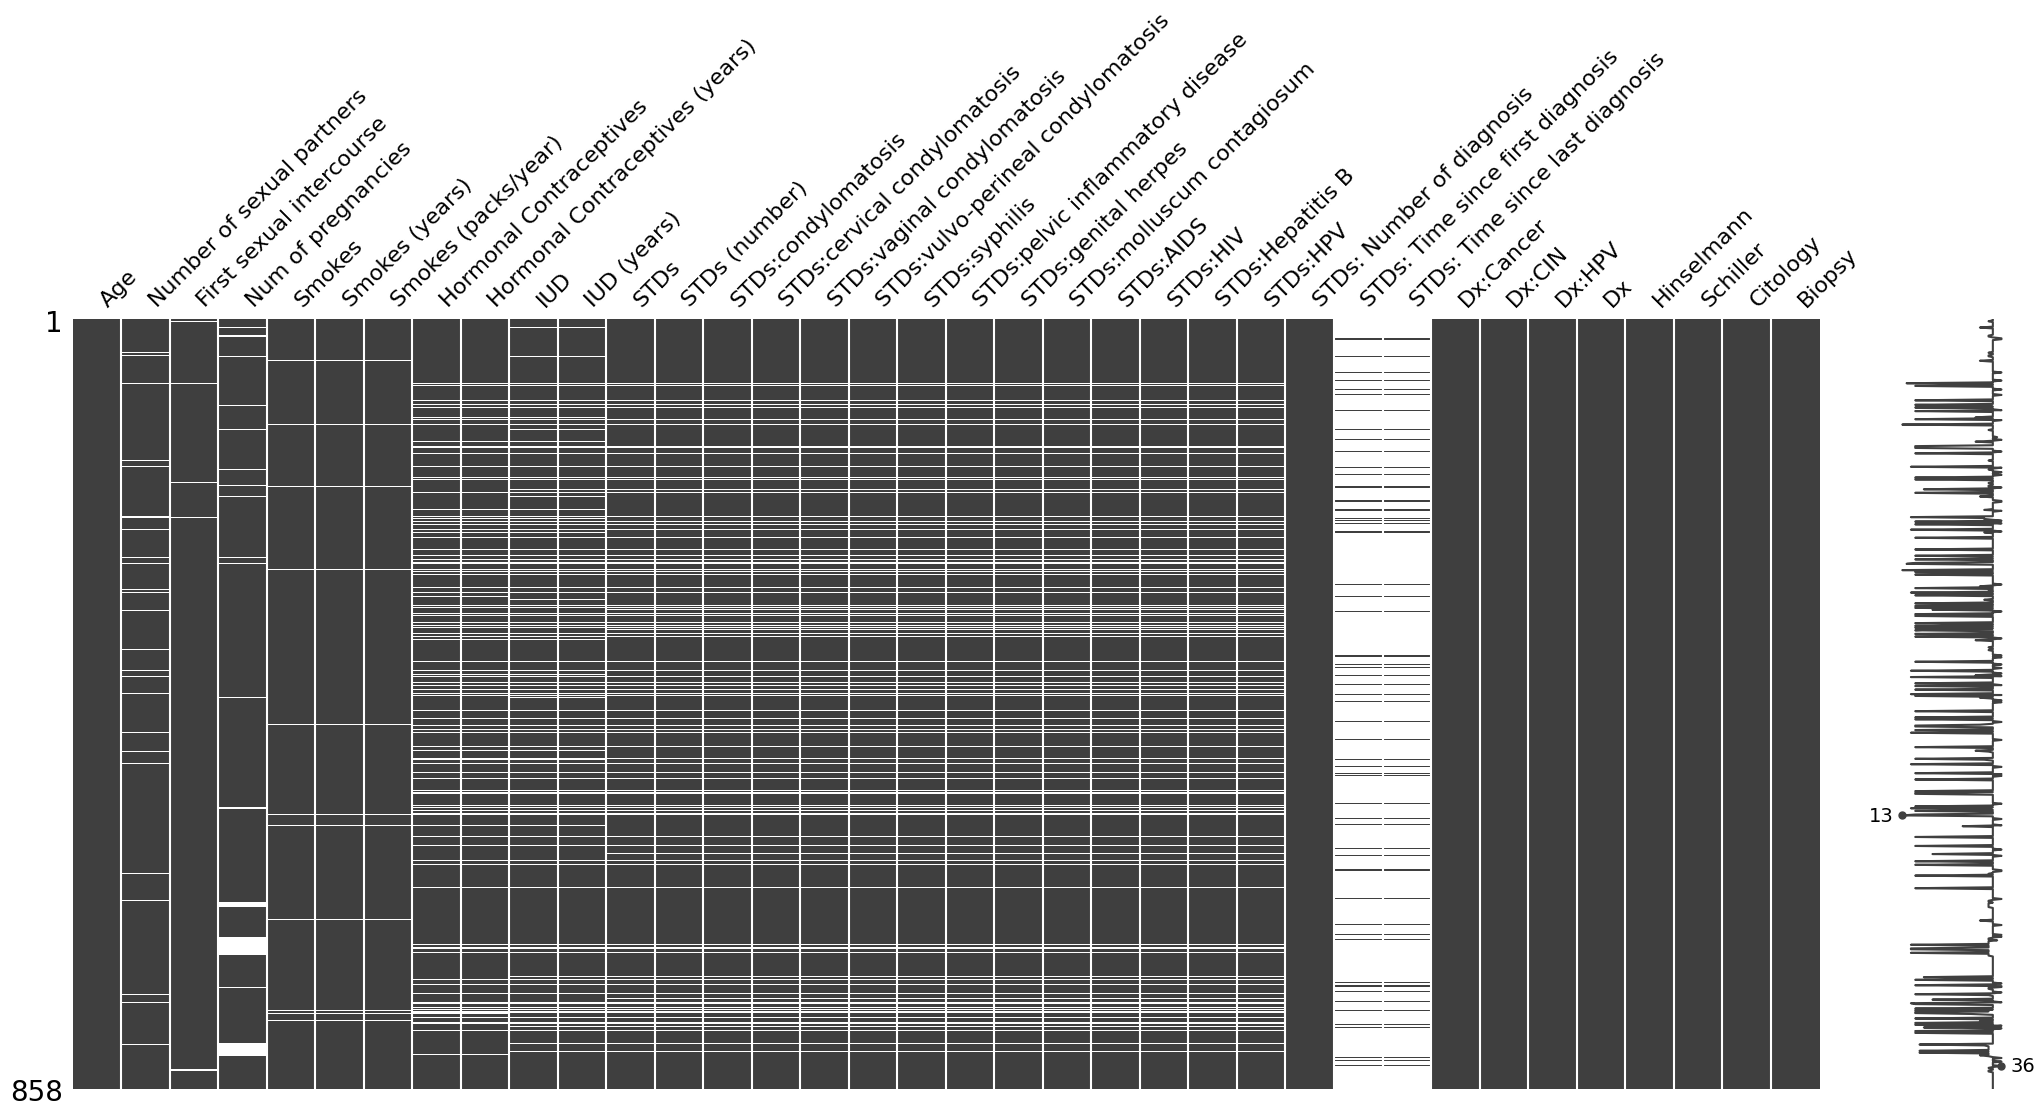

In [16]:
# Distribución de valores faltantes.
msno.matrix(cervical_data)
plt.show()

In [17]:
# Calcular el porcentaje de datos nulos por columna
percentage_missing = (cervical_data.isnull().sum() / len(cervical_data)) * 100

# Crear un DataFrame con los porcentajes
missing_data = pd.DataFrame({'Columna': cervical_data.columns, 'Porcentaje_Nulos': percentage_missing})

# Mostrar el DataFrame con los porcentajes
# Imprimir solo la parte relevante del DataFrame missing_data
print(missing_data[['Porcentaje_Nulos']])

                                    Porcentaje_Nulos
Age                                         0.000000
Number of sexual partners                   3.030303
First sexual intercourse                    0.815851
Num of pregnancies                          6.526807
Smokes                                      1.515152
Smokes (years)                              1.515152
Smokes (packs/year)                         1.515152
Hormonal Contraceptives                    12.587413
Hormonal Contraceptives (years)            12.587413
IUD                                        13.636364
IUD (years)                                13.636364
STDs                                       12.237762
STDs (number)                              12.237762
STDs:condylomatosis                        12.237762
STDs:cervical condylomatosis               12.237762
STDs:vaginal condylomatosis                12.237762
STDs:vulvo-perineal condylomatosis         12.237762
STDs:syphilis                              12.

In [18]:
# Definir el umbral de porcentaje para eliminar filas
umbral_porcentaje = 2.5

# Calcular el porcentaje de valores nulos por fila
percentage_missing_rows = cervical_data.isnull().sum(axis=1) / cervical_data.shape[1] * 100

# Filtrar filas que tienen un porcentaje menor al umbral
rows_to_drop = percentage_missing_rows[percentage_missing_rows < umbral_porcentaje].index

# Eliminar las filas seleccionadas
cervical_data = cervical_data.drop(rows_to_drop)

In [19]:
# Muestra información general del conjunto de datos
cervical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 799 non-null    int64  
 1   Number of sexual partners           773 non-null    object 
 2   First sexual intercourse            792 non-null    object 
 3   Num of pregnancies                  743 non-null    float64
 4   Smokes                              786 non-null    object 
 5   Smokes (years)                      786 non-null    float64
 6   Smokes (packs/year)                 786 non-null    float64
 7   Hormonal Contraceptives             691 non-null    object 
 8   Hormonal Contraceptives (years)     691 non-null    float64
 9   IUD                                 682 non-null    object 
 10  IUD (years)                         682 non-null    float64
 11  STDs                                694 non-n

In [20]:
# Mostrar los valores únicos de cada columna en el conjunto de datos
unique_values = cervical_data.apply(lambda col: col.unique())
print("Valores únicos de cada columna:")
print(unique_values)

Valores únicos de cada columna:
Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, nan, 7.0, 15.0,...
First sexual intercourse              [15.0, 14.0, nan, 16.0, 21.0, 23.0, 17.0, 26.0...
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, nan, 8.0, 7.0, ...
Smokes                                                                  [0.0, 1.0, nan]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, nan,...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                 [0.0, 1.0, nan]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                     [0.0, 1.0, nan]
IUD (years)                           [0.0, 7.0, nan, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0,...


In [21]:
# Imputar valores nulos por la mediana para columnas numéricas
numeric_columns = cervical_data.select_dtypes(include=['float64']).columns
cervical_data[numeric_columns] = cervical_data[numeric_columns].fillna(cervical_data[numeric_columns].median())

# Imputar valores nulos por el valor más frecuente para columnas categóricas
categorical_columns = cervical_data.select_dtypes(include=['object']).columns
cervical_data[categorical_columns] = cervical_data[categorical_columns].apply(lambda x: x.fillna(x.value_counts().idxmax()))

# Verificar que no haya más valores nulos después de la imputación
print(cervical_data.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [22]:
# Muestra información general del conjunto de datos
cervical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 799 non-null    int64  
 1   Number of sexual partners           799 non-null    object 
 2   First sexual intercourse            799 non-null    object 
 3   Num of pregnancies                  799 non-null    float64
 4   Smokes                              799 non-null    object 
 5   Smokes (years)                      799 non-null    float64
 6   Smokes (packs/year)                 799 non-null    float64
 7   Hormonal Contraceptives             799 non-null    object 
 8   Hormonal Contraceptives (years)     799 non-null    float64
 9   IUD                                 799 non-null    object 
 10  IUD (years)                         799 non-null    float64
 11  STDs                                799 non-n

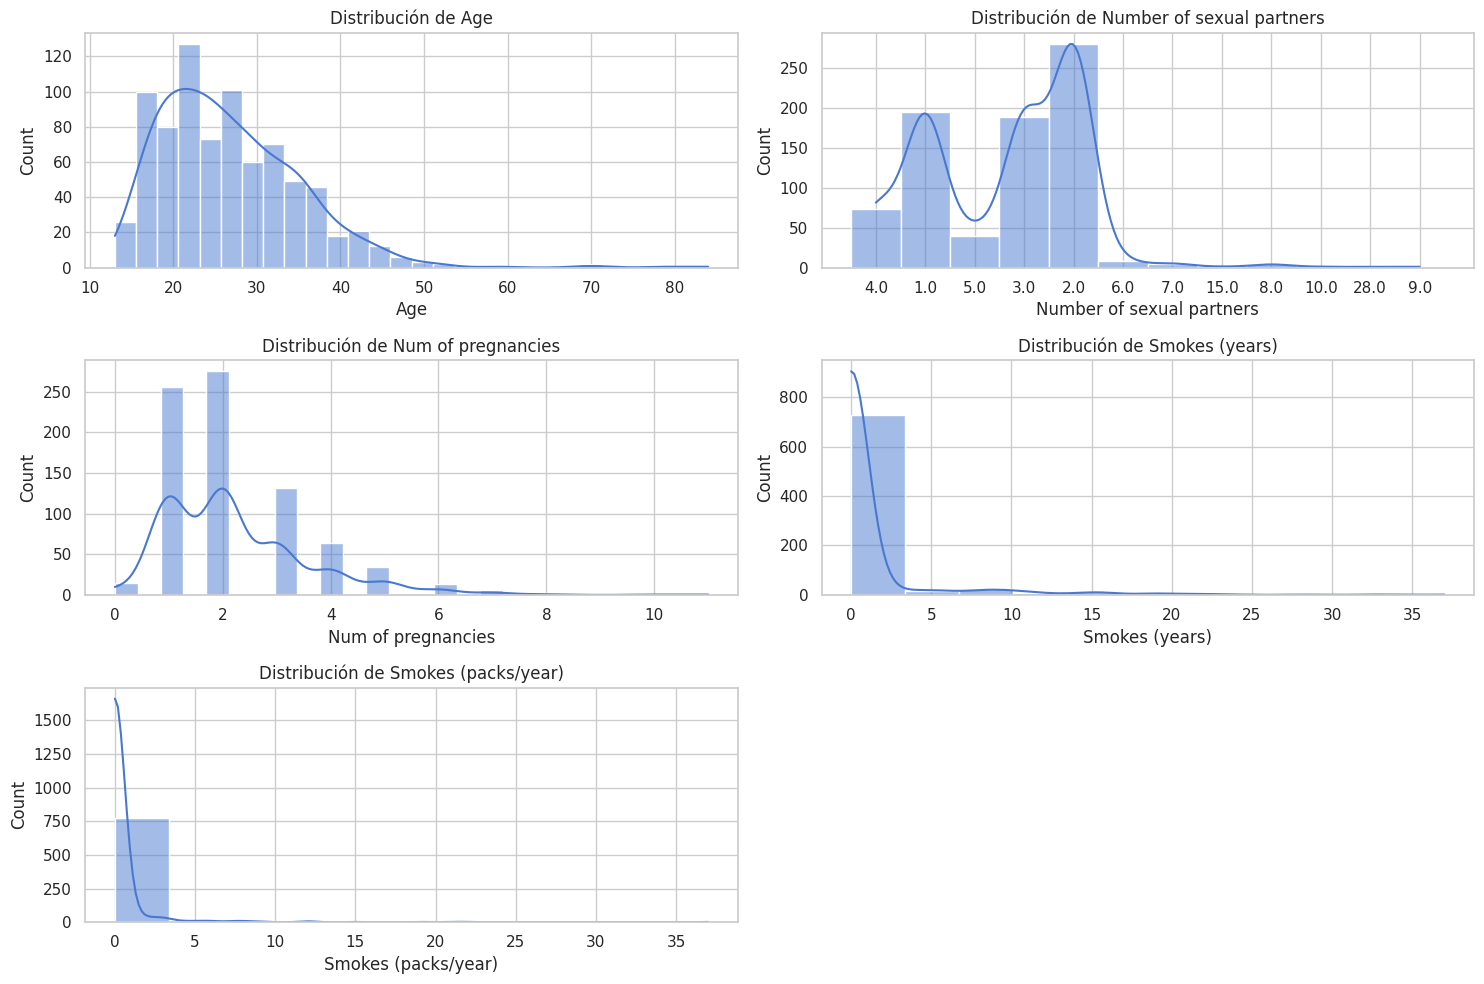

In [26]:
# Cargar los datos (asegúrate de tener cargado tu DataFrame, podrías necesitar cargarlo de nuevo)
# cervical_data = pd.read_csv(data_path)

# Visualizar la distribución de variables numéricas
numerical_features = ["Age", "Number of sexual partners", "Num of pregnancies", "Smokes (years)", "Smokes (packs/year)"]
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(cervical_data[feature].dropna(), kde=True)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()



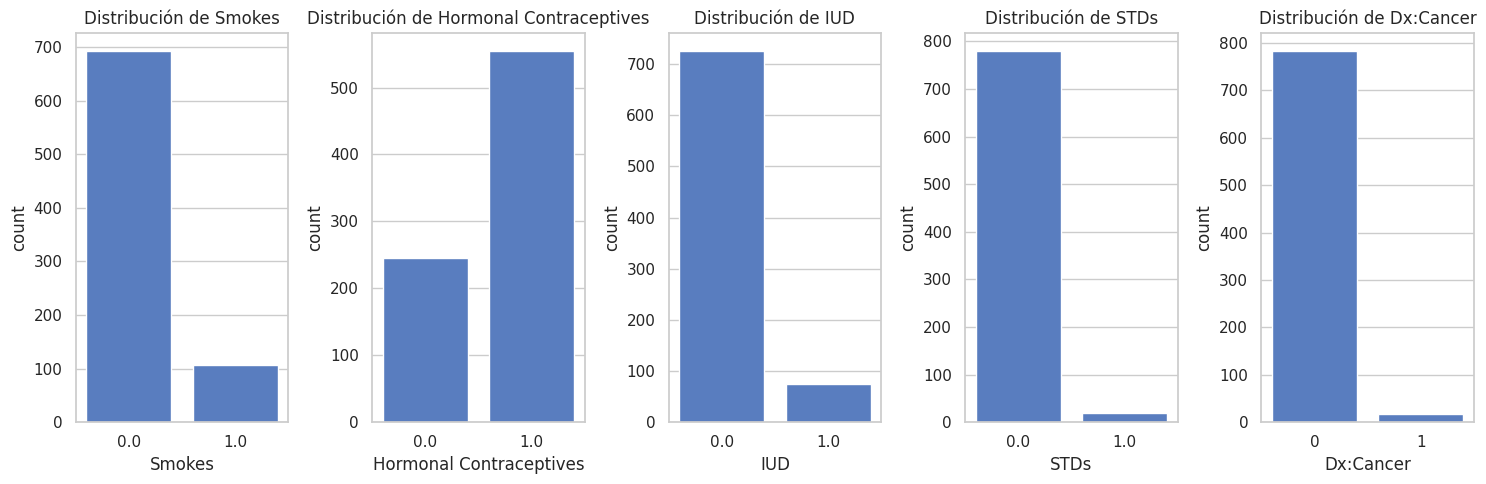

In [28]:
# Visualizar la distribución de variables categóricas
categorical_features = ["Smokes", "Hormonal Contraceptives", "IUD", "STDs", "Dx:Cancer"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 5, i)
    sns.countplot(x=feature, data=cervical_data)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()



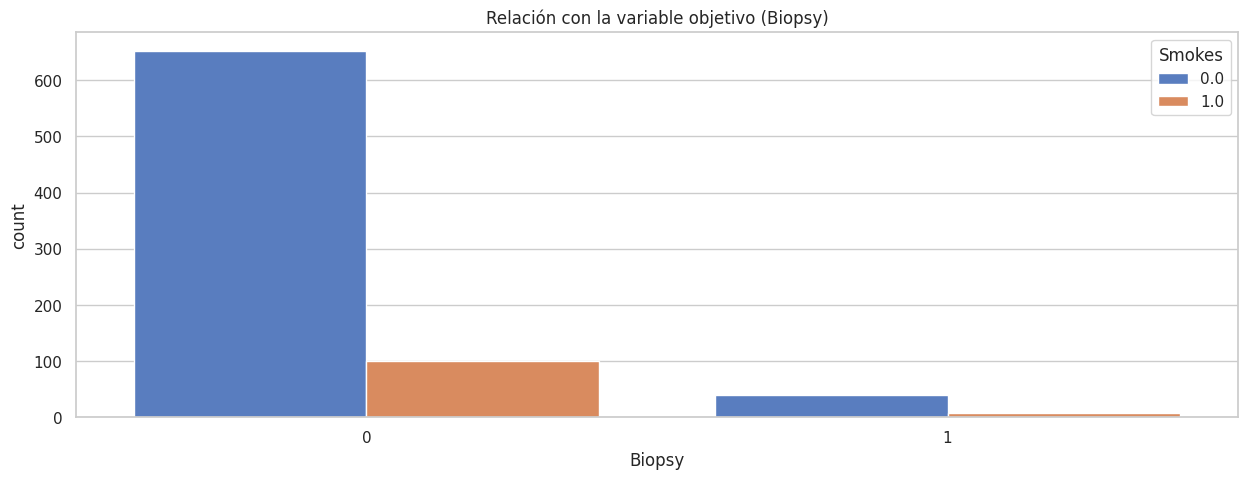

In [29]:
# Relación con la variable objetivo (Biopsy)
plt.figure(figsize=(15, 5))
sns.countplot(x="Biopsy", data=cervical_data, hue="Smokes")
plt.title("Relación con la variable objetivo (Biopsy)")
plt.show()